# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle
import numpy as np
import csv

# TODO: Fill this in based on where you saved the training and testing data

training_file = "./train.p"
validation_file = "./valid.p"
testing_file = "./test.p"


with open(training_file, mode='rb') as f1:
    train = pickle.load(f1)
with open(validation_file, mode='rb') as f2:
    valid = pickle.load(f2)
with open(testing_file, mode='rb') as f3:
    test = pickle.load(f3)
    
X_train, y_train = train['features'], train['labels']
assert(X_train.shape[0] == y_train.shape[0])
X_valid, y_valid = valid['features'], valid['labels']
assert(X_valid.shape[0] == y_valid.shape[0])
X_test, y_test = test['features'], test['labels']
assert(X_test.shape[0] == y_test.shape[0])

def map_classes(filename):
    """ Utility function to map class identifiers to class names"""
    class_map = {}
    with open(filename, 'r') as f:
        csvreader = csv.reader(f, delimiter = ',')
        next(csvreader)  # skipping header row
        for row in csvreader:
            if len(row) != 2:
                continue
            class_map[int(row[0])] = row[1]
        return class_map
    return None

# the following dict maps values from class code to class name
# we can also count its values to make correct one-hot encoding
class_map = map_classes('./signnames.csv')
assert ( class_map != None)

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

Number of training examples = 34799
Number of validation examples = 4410
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


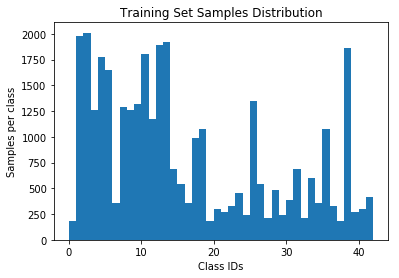

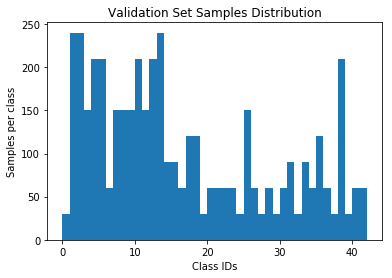

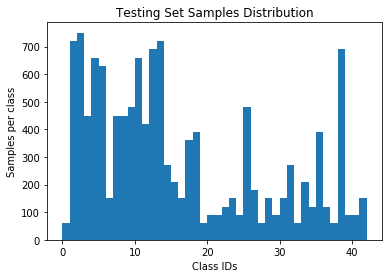

In [2]:
# module to import deepcopy from
import copy
### Data exploration visualization code goes here.
import matplotlib.pyplot as plt
import random
# Visualizations will be shown in the notebook.
%matplotlib inline

# Number of training examples
n_train = X_train.shape[0]

# Number of validation examples.
n_valid = X_valid.shape[0]

# Number of testing examples.
n_test = X_test.shape[0]

# What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# How many unique classes/labels there are in the dataset.
train_unique = np.unique(y_train)
test_unique = np.unique(y_test)
valid_unique = np.unique(y_valid)

all_unique = copy.deepcopy(test_unique)
np.unique(np.append(all_unique,train_unique))
np.unique(np.append(all_unique, valid_unique))
n_classes = len(all_unique)

print("Number of training examples =", n_train)
print("Number of validation examples =", n_valid)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

# ------------------------------------------------------
plt.figure
plt.hist(y_train, bins=range(n_classes))
plt.xlabel('Class IDs')
plt.ylabel('Samples per class')
plt.title('Training Set Samples Distribution')
plt.show()
# ------------------------------------------------------
plt.figure
plt.hist(y_valid, bins=range(n_classes))
plt.xlabel('Class IDs')
plt.ylabel('Samples per class')
plt.title('Validation Set Samples Distribution')
plt.show()
# ------------------------------------------------------
plt.figure
plt.hist(y_test, bins=range(n_classes))
plt.xlabel('Class IDs')
plt.ylabel('Samples per class')
plt.title('Testing Set Samples Distribution')
plt.show()

### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

Class ID,Sign Name,Sample Image,Number of Examples
0,Speed limit (20km/h),,180
1,Speed limit (30km/h),,1980
2,Speed limit (50km/h),,2010
3,Speed limit (60km/h),,1260
4,Speed limit (70km/h),,1770
5,Speed limit (80km/h),,1650
6,End of speed limit (80km/h),,360
7,Speed limit (100km/h),,1290
8,Speed limit (120km/h),,1260
9,No passing,,1320

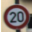
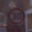
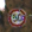
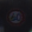
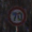
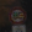
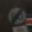
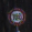
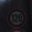
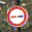
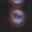
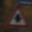
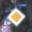
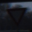
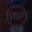
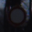
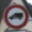
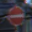
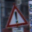
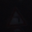
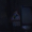
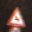
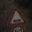
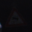
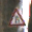
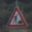
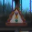
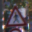
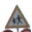
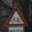
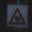
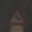
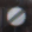
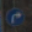
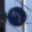
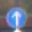
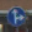
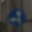
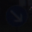
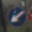
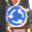
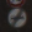
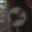

In [3]:
# need to load a bunch of modules to nicely display a table of images
from IPython.display import HTML, display, Image
import PIL
from io import BytesIO
from base64 import b64encode

# header of our table 
html = "<table style='border: 1px solid black'>"
html += "<tr><td><b>Class ID</b></td><td><b>Sign Name</b></td><td><b>Sample Image</b></td><td><b>Number of Examples</b></td></tr>"

def img_array(ima):
    """ Utility function to convert image to base64-encoded string for embedding in html table"""
    im = PIL.Image.fromarray(ima)
    bio = BytesIO()
    im.save(bio, format='png')
    return b64encode(bio.getvalue()).decode('utf-8')

for class_id in range(n_classes):
    # adding rows to the table. Each row corresponds to a class
    itemindex = np.where(y_train == class_id)
    num_samples = len(itemindex[0])
    image = X_train[itemindex[0][0]].squeeze()
    html += "<tr><td>{}</td><td>{}</td><td><img src='data:image/png;base64,{}'/></td><td>{}</td></tr>"\
        .format(class_id, class_map[class_id],img_array(image), num_samples)

# display table
html += "</table>"
display(HTML(html))


----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Pre-process the Data Set (normalization, grayscale, etc.)

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [4]:
### Preprocess the data here. Preprocessing steps could include normalization, converting to grayscale, etc.
### Feel free to use as many code cells as needed.
import tensorflow as tf
from sklearn.utils import shuffle

# Input is a 3-channel 32x32 image
x = tf.placeholder(tf.float32, (None, 32, 32, 3))
y = tf.placeholder(tf.int32, (None))
dropout_rate = tf.placeholder(tf.float32)
ln_rate = tf.placeholder(tf.float32)
augment_flag = tf.placeholder(tf.bool)
one_hot_y = tf.one_hot(y, len(class_map.keys()))

EPOCHS = 30
BATCH_SIZE = 128

# preprocessing the training and validation sets. Calculating the  
# mean using a numpy method. We subtract it from each pixel 
# and divide by 128 to have all features in range of [-1, 1]. Assumption that 
# originally all pixel values are in the rage of [0, 255]
x_mean = X_train.mean()
print("Using mean value of {} for processing the dataset".format(x_mean))
X_train = X_train.astype('float32')
X_train = X_train - x_mean
x_std = X_train.std()
print("Using standard deviation value value of {} for processing the dataset".format(x_std))
X_train = X_train / x_std

X_valid = X_valid.astype('float32')
X_valid = X_valid - x_mean # using mean from the training set
X_valid = X_valid / x_std

X_test = X_test.astype('float32')
X_test = X_test - x_mean # using mean from the training set
X_test = X_test / x_std

Using mean value of 82.6775890369964 for processing the dataset
Using standard deviation value value of 67.8508071899414 for processing the dataset


### Model Architecture

In [5]:
from tensorflow.contrib.layers import flatten

def prep_data_augment(image):
    """Augmentation routine. Executed inside Tensorflow! If you have a GPU it will work on GPU!"""
    # perform random brighness, contrast augmentation
    image = tf.image.random_brightness(image, max_delta=60/255.0)
    image = tf.image.random_contrast(image, lower=0.25, upper=1.7)
    return image

def data_augment(input_tensor):
    """Augmentation routine wrapper"""
    output_tensor = tf.map_fn(prep_data_augment, input_tensor)
    return output_tensor

def identity(input_tensor):
    """Identity routine that returns the input unchanged"""
    return input_tensor

def LeNet(x, dropout_rate, augment_flag):    
    """ Definition of the LeNet architectur for this problem """
    mu = 0
    sigma = 0.1
    weights = {
        # important - changing the number of input channels to 3
        'wc1' : tf.Variable(tf.truncated_normal(shape=(5, 5, 3, 6), mean = mu, stddev = sigma)),
        'wc2' : tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma)),
        'wfc1' : tf.Variable(tf.truncated_normal(shape=(5*5*16, 120), mean = mu, stddev = sigma)),
        'wfc2' : tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma)),
        'wfc3' : tf.Variable(tf.truncated_normal(shape=(84, len(class_map.keys())), mean = mu, stddev = sigma)) 
        # 43 classes
    }
    biases = {
        'bc1' : tf.Variable(tf.zeros(6)),
        'bc2' : tf.Variable(tf.zeros(16)),
        'bfc1' : tf.Variable(tf.zeros(120)), 
        'bfc2' : tf.Variable(tf.zeros(84)),
        'bfc3' : tf.Variable(tf.zeros(len(class_map.keys()))) # 43 classes
    }

    #checking if we  want to augment our input images 
    x = tf.cond(augment_flag, lambda: data_augment(x), lambda: identity(x))
    
    conv_1 = tf.nn.conv2d(x, weights['wc1'], strides = [1, 1, 1, 1], padding = 'VALID')
    conv_1 = tf.nn.bias_add(conv_1, biases['bc1'])
    conv_1 = tf.nn.relu(conv_1)

    pool_1 = tf.nn.max_pool(conv_1, ksize = [1, 2, 2, 1], strides = [1, 2, 2, 1], padding = 'VALID')

    conv_2 = tf.nn.conv2d(pool_1, weights['wc2'], strides = [1, 1, 1, 1], padding = 'VALID')
    conv_2 = tf.nn.bias_add(conv_2, biases['bc2'])
    conv_2 = tf.nn.relu(conv_2)

    pool_2 = tf.nn.max_pool(conv_2, ksize = [1, 2, 2, 1], strides = [1, 2, 2, 1], padding = 'VALID')

    #flattening mutidimensional array
    pool_2 = tf.contrib.layers.flatten(pool_2)

    fc_1 = tf.matmul(pool_2, weights['wfc1']) + biases['bfc1']
    fc_1 = tf.nn.dropout(fc_1,dropout_rate) # using dropout for regularization
    fc_1 = tf.nn.relu(fc_1)

    fc_2 = tf.matmul(fc_1, weights['wfc2']) + biases['bfc2']
    fc_2 = tf.nn.dropout(fc_2,dropout_rate) # using dropout for regularization
    fc_2 = tf.nn.relu(fc_2)

    fc_3 = tf.matmul(fc_2, weights['wfc3']) + biases['bfc3']
    logits = fc_3

    
    return logits

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the test set but low accuracy on the validation set implies overfitting.

In [6]:
### Training my model and
### Calculating and reporting the accuracy on the training and validation set.
### the accuracy on the test set should be calculated and reported as well.

rate = 0.001

logits = LeNet(x, dropout_rate, augment_flag)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = ln_rate)
training_operation = optimizer.minimize(loss_operation)

correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    """ Evaluation routine """
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, dropout_rate: 1, augment_flag: False})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples



with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        #slashing learning rate to one-fifth times after half the training done. This allows to learn in finer details
        if i==EPOCHS//2:
            rate=rate*0.2
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, dropout_rate: 0.5, augment_flag: True, ln_rate: rate})
            
        validation_accuracy = evaluate(X_valid, y_valid)
        print("EPOCH {} ... Learning rate = {}".format(i+1, rate))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()

    print("Training set model's performance on dependent training set...")
    train_accuracy = evaluate(X_train, y_train)
    print("Train Accuracy = {:.3f}".format(train_accuracy))
    print("Testing model's performance on separate test set...")
    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))
    print()
        
    saver.save(sess, './traffic_signs')
    print("Model saved")

Training...

EPOCH 1 ... Learning rate = 0.001
Validation Accuracy = 0.549

EPOCH 2 ... Learning rate = 0.001
Validation Accuracy = 0.788

EPOCH 3 ... Learning rate = 0.001
Validation Accuracy = 0.863

EPOCH 4 ... Learning rate = 0.001
Validation Accuracy = 0.896

EPOCH 5 ... Learning rate = 0.001
Validation Accuracy = 0.913

EPOCH 6 ... Learning rate = 0.001
Validation Accuracy = 0.922

EPOCH 7 ... Learning rate = 0.001
Validation Accuracy = 0.932

EPOCH 8 ... Learning rate = 0.001
Validation Accuracy = 0.935

EPOCH 9 ... Learning rate = 0.001
Validation Accuracy = 0.945

EPOCH 10 ... Learning rate = 0.001
Validation Accuracy = 0.946

EPOCH 11 ... Learning rate = 0.001
Validation Accuracy = 0.951

EPOCH 12 ... Learning rate = 0.001
Validation Accuracy = 0.943

EPOCH 13 ... Learning rate = 0.001
Validation Accuracy = 0.948

EPOCH 14 ... Learning rate = 0.001
Validation Accuracy = 0.960

EPOCH 15 ... Learning rate = 0.001
Validation Accuracy = 0.960

EPOCH 16 ... Learning rate = 0.0002


---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

Original Test Images:


Test Images Scalled in 32x32:


Class ID,Sign Name,Sample Image
6,End of speed limit (80km/h),
18,General caution,
39,Keep left,
17,No entry,
9,No passing,
1,Speed limit (30km/h),
12,Priority road,
40,Roundabout mandatory,
14,Stop,
13,Yield,

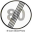
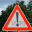
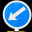
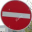
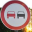
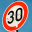
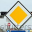
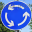
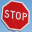
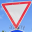

In [7]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
import cv2
#defining our test set manually. The images are located in "test_set" directory
testset_list = [
    {"filename": "EndSpeedLimit_80.jpeg",
        "class_id": 6},
    {"filename": "GeneralWarning.jpeg",
        "class_id": 18},
    {"filename": "KeepLeft.jpeg",
        "class_id": 39},
    {"filename": "NoEntry.jpeg",
        "class_id": 17},
    {"filename": "NoPassing.jpeg",
        "class_id": 9},
    {"filename": "SpeedLimit_30.jpeg",
        "class_id": 1},
    {"filename": "PriorityRoad.jpeg",
        "class_id": 12},
    {"filename": "RoundAbout.jpeg",
        "class_id": 40},
    {"filename": "Stop.jpeg",
        "class_id": 14},
    {"filename": "Yield.jpeg",
        "class_id": 13}
]
print ("Original Test Images:")
imagesList=''.join( ["<img style='width: 90px; margin: 0px; float: left; border: 1px solid black;' src='test_set/%s' />" % str(s['filename']) 
                 for s in testset_list])
display(HTML(imagesList))

print ("Test Images Scalled in 32x32:")


# header of our table 
html = "<table style='border: 1px solid black'>"
html += "<tr><td><b>Class ID</b></td><td><b>Sign Name</b></td><td><b>Sample Image</b></td></tr>"

for image in testset_list:
    # adding rows to the table. Each row corresponds to a class
    img = cv2.imread('test_set/{}'.format(image["filename"]))
    thumbnail = cv2.resize(img, (32, 32),interpolation=3)  # setting cubic interpolation while resizing image
    thumbnail = cv2.cvtColor(thumbnail,cv2.COLOR_BGR2RGB)
    image['thumbnail'] = thumbnail
    html += "<tr><td>{}</td><td>{}</td><td><img src='data:image/png;base64,{}'/></td></tr>"\
        .format(image["class_id"], class_map[int(image["class_id"])],img_array(thumbnail))
    # preprocessing thumbnail for DNN inference
    test_sample = thumbnail.astype('float32')
    test_sample = test_sample - x_mean
    test_sample = test_sample/x_std
    image['test_sample'] = test_sample

# display table
html += "</table>"
display(HTML(html))

### Predict the Sign Type for Each Image

Predicting labels using trained CNN:


GT Sign Name,GT Image,Prediction,Prediction result
End of speed limit (80km/h),,End of speed limit (80km/h),True
General caution,,General caution,True
Keep left,,Turn right ahead,False
No entry,,No entry,True
No passing,,No passing,True
Speed limit (30km/h),,Speed limit (30km/h),True
Priority road,,Priority road,True
Roundabout mandatory,,Roundabout mandatory,True
Stop,,Stop,True
Yield,,Yield,True

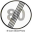
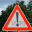
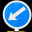
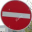
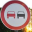
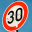
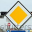
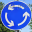
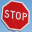
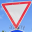

In [8]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
print ("Predicting labels using trained CNN:")
with tf.Session() as sess:
    saver.restore(sess, './traffic_signs')
    
    # header of our table 
    html = "<table style='border: 1px solid black'>"
    html += "<tr><td><b>GT Sign Name</b></td><td><b>GT Image</b></td><td><b>Prediction</b></td><td><b>Prediction result</b></td></tr>"
    
    for image in testset_list:
        output = sess.run(tf.argmax(logits, 1), feed_dict = {x: [image['test_sample']], dropout_rate: 1, augment_flag: False})
        # recording results of prediction to show the accuracy in the next cell
        image['prediction'] = int(output)==image['class_id']
        thumbnail = image['thumbnail']
        html += "<tr><td>{}</td><td><img src='data:image/png;base64,{}'/></td><td>{}</td><td>{}</td></tr>"\
        .format(class_map[int(image["class_id"])],img_array(thumbnail),class_map[int(output)],int(output)==image['class_id'])
    # display table
    html += "</table>"
    display(HTML(html))

### Analyze Performance

In [9]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.
accuracy = 0.0
for image in testset_list:
    accuracy += image['prediction']

print("Accuracy of classification obtained on {} test images is {}%".format(len(testset_list),100.0*accuracy/len(testset_list)))

Accuracy of classification obtained on 10 test images is 90.0%


### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tk.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

Predicting top-5 labels using trained CNN:


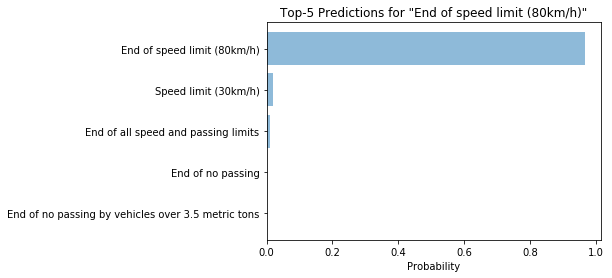

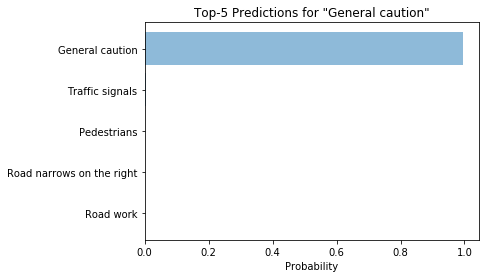

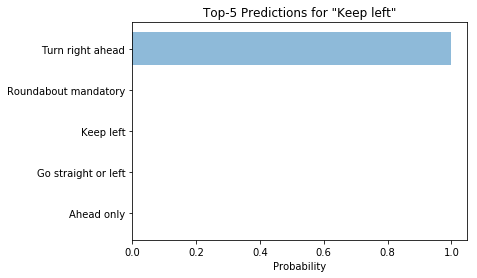

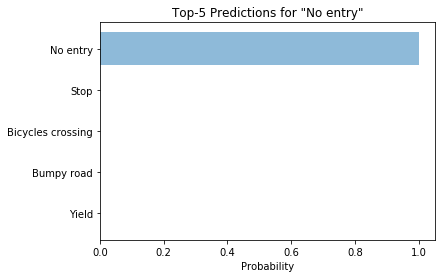

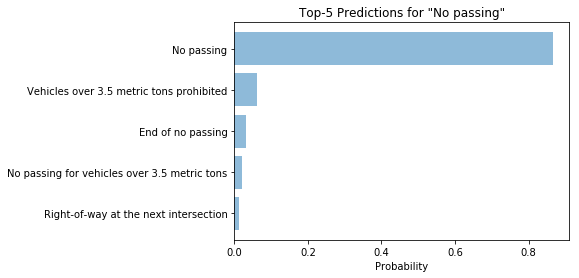

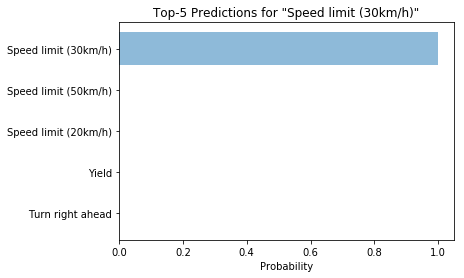

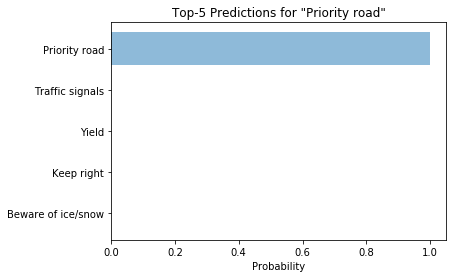

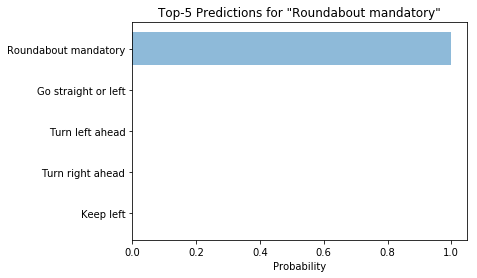

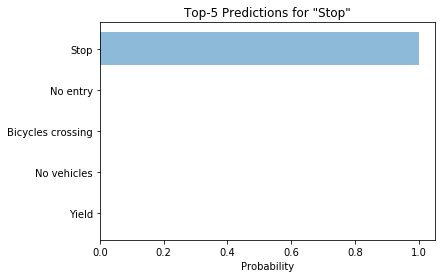

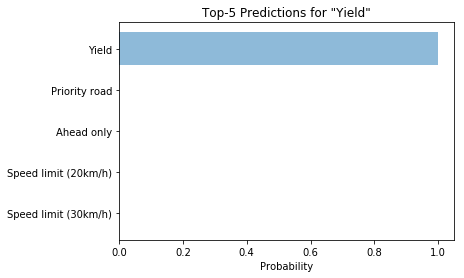

In [10]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images 
### found on the web. 
print ("Predicting top-5 labels using trained CNN:")
with tf.Session() as sess:
    saver.restore(sess, './traffic_signs')
    for image in testset_list:
        output = sess.run(tf.nn.top_k(tf.nn.softmax(logits), k=5), feed_dict = {x: [image['test_sample']], dropout_rate: 1, augment_flag: False})
        #formatting the outputs into bar-charts 
        objects = [class_map[output.indices[0,0]], class_map[output.indices[0,1]], class_map[output.indices[0,2]], class_map[output.indices[0,3]], class_map[output.indices[0,4]]]
        y_pos = np.arange(len(objects))
        performance = [output.values[0,0],output.values[0,1],output.values[0,2],output.values[0,3],output.values[0,4]]
        # reversing the lists so that the top probability is actually on top of the graph
        objects.reverse()
        performance.reverse()
        #-- plotting...
        plt.barh(y_pos, performance, align='center', alpha=0.5)
        plt.yticks(y_pos, objects)
        plt.xlabel('Probability')
        plt.title('Top-5 Predictions for "{}"'.format(class_map[int(image["class_id"])]))

        plt.show()



> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the IPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 